In [1]:
import numpy as np

f = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/umap_dict_file.npz"

f = np.load(f, allow_pickle=True)

spec = f["behavioralArr"]
labels = f["colors_per_timepoint"]



In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_labels(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["s"]  # Spectrogram data
    labels = data["hdbscan_labels"]  # Integer labels per timepoint
    embedding = data["embedding_outputs"]

    print(embedding.shape)

    # Only consider the first 1000 timepoints for plotting
    spec_slice = spec[4000:5000, :]  # Take all frequency bins, but only the first 1000 timepoints
    labels_slice = labels[4000:5000]  # Take the first 1000 labels
    spec_slice = spec_slice.T

    print(spec_slice.shape)
    print(labels_slice.shape)

    # Create a colormap for the labels
    unique_labels = np.unique(labels_slice)
    num_labels = len(unique_labels)
    cmap = plt.get_cmap('viridis', num_labels)
    colors = cmap(np.linspace(0, 1, num_labels))

    # Set up the figure and gridspec
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(2, 1, height_ratios=[20, 1], hspace=0.05)

    # Create a spectrogram axis
    ax0 = fig.add_subplot(gs[0])
    im = ax0.imshow(spec_slice, aspect='auto', origin='lower')
    ax0.set_xlabel('Time [sec]')
    ax0.set_ylabel('Frequency [Hz]')
    ax0.set_title('Spectrogram and Labels')

    # Create an axis for the labels color bar
    ax1 = fig.add_subplot(gs[1])
    label_colors = [colors[np.where(unique_labels == label)[0][0]] for label in labels_slice]
    label_colors = np.array(label_colors).reshape(1, -1, 4)
    ax1.imshow(label_colors, aspect='auto', origin='lower')

    # Remove y-ticks, y-label and x-ticks from the labels color bar
    ax1.axis('off')

    plt.show()

# Load the NPZ file and call the function to plot
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/labels_budgie_test_gelu_output.npz"
plot_spectrogram_with_labels(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/labels_budgie_test_gelu_output.npz'

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_embedding(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["s"]  # Spectrogram data
    labels = data["hdbscan_labels"]  # Integer labels per timepoint
    embedding = data["embedding_outputs"]
    print(embedding.shape)

    # Only consider the first 1000 timepoints for plotting
    spec_slice = spec[0:5000, :]  # Take all frequency bins, but only the first 1000 timepoints
    embedding_slice = embedding[0:5000, :]  # Take the first 1000 embedding coordinates
    spec_slice = spec_slice.T
    print(spec_slice.shape)
    print(embedding_slice.shape)

    # Normalize the spectrogram values to the range [0, 1]
    spec_slice_normalized = (spec_slice - np.min(spec_slice)) / (np.max(spec_slice) - np.min(spec_slice))

    # Normalize the embedding dimensions between 0 and 1
    embedding_slice_normalized = (embedding_slice - embedding_slice.min(axis=0)) / (embedding_slice.max(axis=0) - embedding_slice.min(axis=0))

    # Create a colormap for the embedding gradient
    cmap = plt.get_cmap('viridis')

    # Set up the figure and gridspec
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(2, 1, height_ratios=[20, 1], hspace=0.05)

    # Create a spectrogram axis
    ax0 = fig.add_subplot(gs[0])
    im = ax0.imshow(spec_slice_normalized, aspect='auto', origin='lower', cmap='inferno')
    ax0.set_xlabel('Time [sec]')
    ax0.set_ylabel('Frequency [Hz]')
    ax0.set_title('Spectrogram and Embedding')

    # Add a colorbar for the spectrogram
    cbar = fig.colorbar(im, ax=ax0)
    cbar.set_label('Normalized Value')

    # Create an axis for the embedding gradient colorbar
    ax1 = fig.add_subplot(gs[1])
    embedding_colors = cmap(embedding_slice_normalized)
    ax1.imshow(embedding_colors.reshape(1, -1, 4), aspect='auto', origin='lower')

    # Remove y-ticks and y-label from the embedding gradient colorbar
    ax1.set_yticks([])
    ax1.set_ylabel('')

    plt.show()

# Load the NPZ file and call the function to plot
file_path = "/media/george-vengrovski/disk2/canary/sorted_1/combined_spec/USA5283_45330.37522418_2_8_10_25_22_27758_29144.npz"
plot_spectrogram_with_embedding(file_path)

KeyError: 'hdbscan_labels is not a file in the archive'

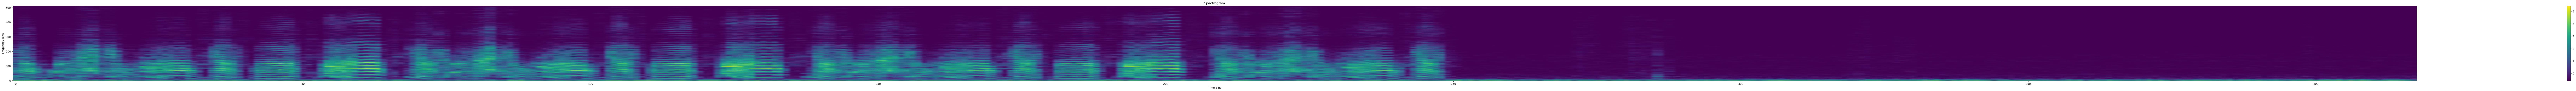

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .npz file
file_path = "/media/george-vengrovski/disk2/zebra_finch/combined_specs/A01_44815.32349530_9_11_8_59_9_0.npz"

# Load the .npz file
data = np.load(file_path, allow_pickle=True)

# Plot the spectrogram
plt.figure(figsize=(200, 5))  # Set the figure size (width, height) in inches
plt.imshow(data['s'], aspect='auto', origin='lower')
plt.colorbar()  # Add a colorbar to indicate the scale
plt.xlabel('Time Bins')  # Label for the x-axis
plt.ylabel('Frequency Bins')  # Label for the y-axis
plt.title('Spectrogram')  # Title of the plot
plt.show()
